In [1]:
import numpy as np
import pandas as pd
import data_helper
import matplotlib.pyplot as plt
from sklearn import linear_model

## Cargando los Datos

### Descripcion de los Datos

**Area_Lote**: Area del lote en metros cuadrados

**Precio**: Precio total de la propiedad en Quetzales

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Modelos de Regresion Lineal

### Modelo 1  
$y = 2.41262565 x + 107748.55024667$

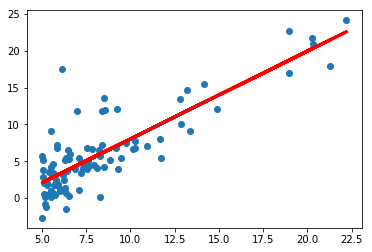

In [4]:
reg = linear_model.LinearRegression()

x = data['x'].values.reshape(-1, 1)
y = data['y'].values

reg.fit(x,y)

y_hat = reg.predict(x)

plt.scatter(x, y)
plt.plot( x, y_hat, color='red', linewidth=3)
plt.show()

In [5]:
m = reg.coef_[0]
b = reg.intercept_
print(' y = {0} * x  {1}'.format(m, b))

 y = 1.1930336441895935 * x  -3.89578087831185


# Batch Gradient Descent


In [6]:
x_df = pd.DataFrame(data.x)
y_df = pd.DataFrame(data.y)

### Costo
$\operatorname {Costo} ={\frac {1}{2m}}\sum _{i=1}^{m}(h_{\theta}(x)-Y_{i})^{2}$

In [14]:
def cost_function(x, y, theta_1, theta_0):

    m = len(y)

    '''
    ### Implementa tu codigo aqui### 
    Obten los valores de la hipotesis, y calcula el costo utilizando la 
    formula que esta en la celda anterior.
    Esta funcion sera utilizada despues paracalcular el costo en cada iteracion 
    del gradient descent.
    '''
    hipotesis = theta_1*x + theta_0*1
    costo = np.sum((hipotesis-y)**2)/(2*m)

    return costo


#### Probando la funcion de costo
En esta celda vamos a probar la funcion de costo, para los valores de 

$\theta_{0} =  -3.8957808783118537$

$\theta_{1} = 1.193033644189594$

Debemos obtener el valor de 4.476971375975179

In [13]:
theta_0 = -3.8957808783118537
theta_1 = 1.193033644189594

x = np.array(x_df).flatten()
y = np.array(y_df).flatten()

cost_function(x, y, theta_1, theta_0)

4.4769713759751788

### Batch Gradient Descent

Derivada de la funcion de costo:
$\frac{\partial}{\partial \theta} J(\theta) = (h_{\theta}(x)-y) \cdot x_{j} $

En cada repeticion:

$\theta_{0} := \theta_{0} - \alpha {\frac {1}{m}} \sum _{i=1}^{m} (h_{\theta}(x)-y) $

$\theta_{1} := \theta_{1} - \alpha {\frac {1}{m}} \sum _{i=1}^{m} (h_{\theta}(x)-y) \cdot x_{j} $

Iteracion:  0
Costo:  31.981576879


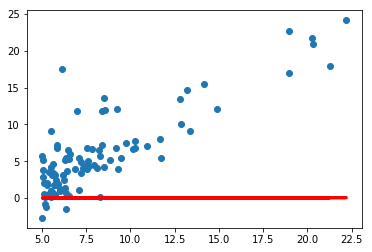

Iteracion:  20
Costo:  30.191833116


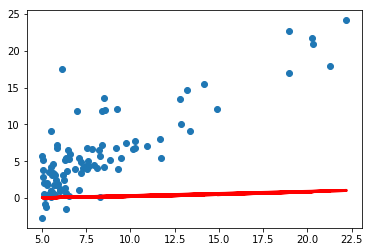

Iteracion:  40
Costo:  28.465701174


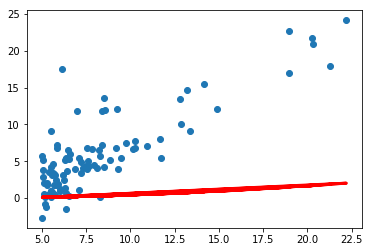

Iteracion:  60
Costo:  26.8031810529


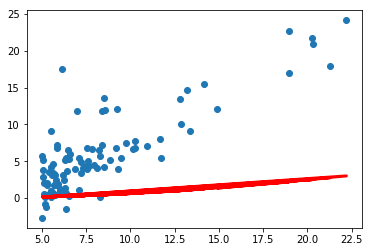

Iteracion:  80
Costo:  25.2042727529


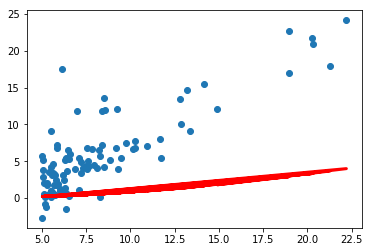

Iteracion:  100
Costo:  23.6689762738


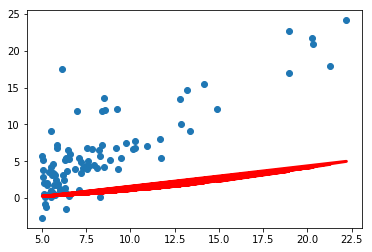

Iteracion:  120
Costo:  22.1972916158


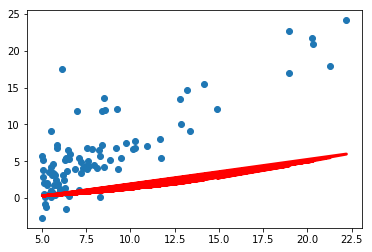

Iteracion:  140
Costo:  20.7892187787


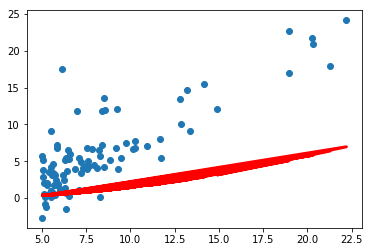

Iteracion:  160
Costo:  19.4447577627


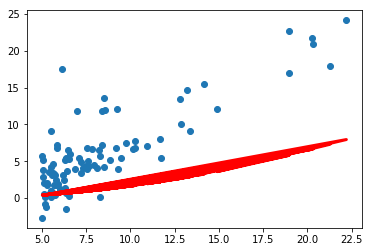

Iteracion:  180
Costo:  18.1639085676


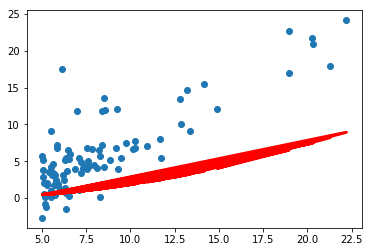

Iteracion:  200
Costo:  16.9466711935


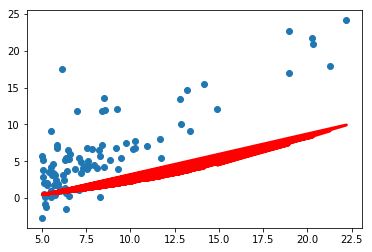

Iteracion:  220
Costo:  15.7930456404


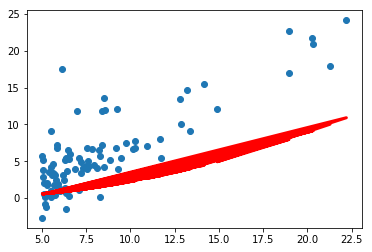

Iteracion:  240
Costo:  14.7030319083


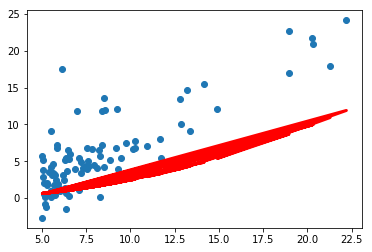

Iteracion:  260
Costo:  13.6766299972


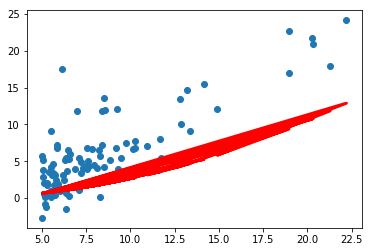

Iteracion:  280
Costo:  12.7138399071


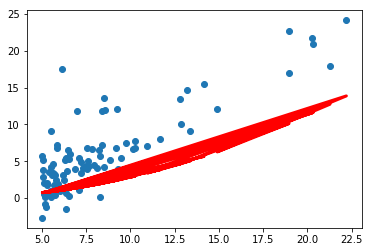

Iteracion:  300
Costo:  11.814661638


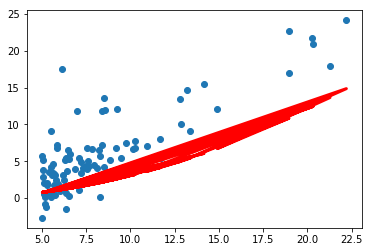

Iteracion:  320
Costo:  10.9790951899


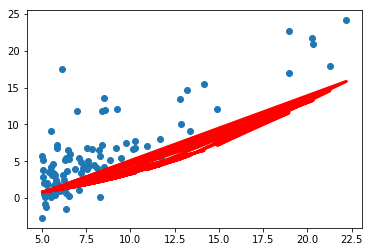

Iteracion:  340
Costo:  10.2071405627


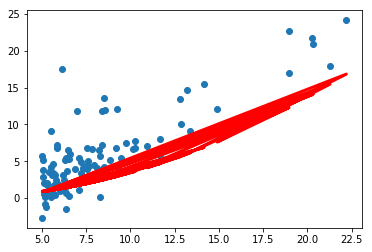

Iteracion:  360
Costo:  9.49879775661


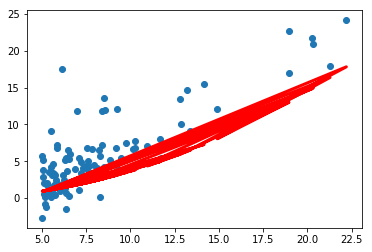

Iteracion:  380
Costo:  8.85406677147


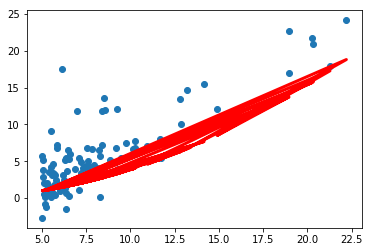

Iteracion:  400
Costo:  8.27294760732


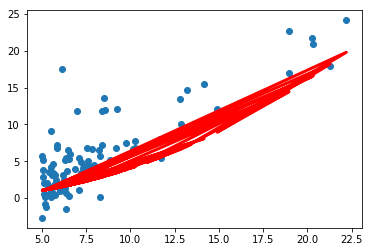

Iteracion:  420
Costo:  7.75544026417


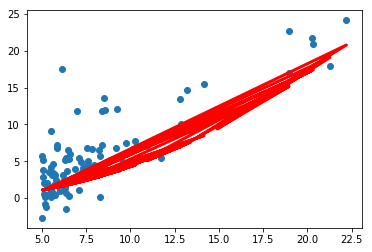

Iteracion:  440
Costo:  7.30154474201


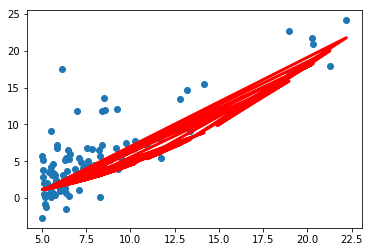

Iteracion:  460
Costo:  6.91126104084


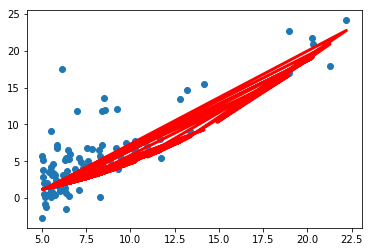

Iteracion:  480
Costo:  6.58458916067


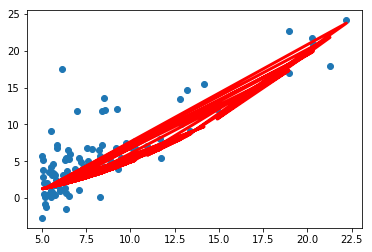

0.050000000000000405 [ 0.305505  0.276385  0.42593   0.35016   0.29299   0.419145  0.37382
  0.428905  0.32431   0.25273   0.285535  0.7082    0.2867    0.42042
  0.282035  0.26897   0.31827   0.256505  0.32148   0.35354   0.309455
  1.0135    0.274505  0.316305  0.278245  0.94725   0.6414    0.54785
  0.6588    1.11015   0.26262   0.32947   0.46241   0.29459   0.410555
  0.39667   0.404795  0.280315  0.6418    0.31767   0.270345  0.344125
  0.5854    0.288685  0.391235  0.354655  0.25351   0.29007   0.585
  0.27708   0.37701   0.265385  0.371195  0.380155  0.31664   0.317945
  0.31371   0.281985  0.46551   0.47268   0.44127   0.258965  1.06395
  0.7454    0.94795   0.36091   0.414755  0.5118    0.27497   1.01705
  0.5068    0.366725  0.30031   0.361295  0.251345  0.327395  0.37693
  0.251825  0.5137    0.255385  0.28646   0.25942   0.317785  0.488435
  0.325795  0.42586   0.45901   0.3001    0.27602   0.25297   0.285385
  0.38183   0.293535  0.26527   0.41467   0.6697    0.271845]
6.3

In [51]:
x = np.array(x_df).flatten()
y = np.array(y_df).flatten()

theta_0 = 0
theta_1 = 0

### ingresa el numero de iteracions y el valor de alpha ###
iterations = 500
alpha = -0.0001


m = len(y) 


for iteration in range(iterations):
    h = theta_1*x  + theta_0
    
    '''
    ## Implementa tu codigo aqui #####
    Calcula los valores de theta0 y theta1
    '''
    theta_0_temp = theta_0 - (alpha * 1)
    theta_1_temp = theta_1 - (alpha * x)
    
    theta_0 = theta_0_temp
    theta_1 = theta_1_temp
    
    '''
    ## Implementa tu codigo aqui ####
    Utiliza la funcion de costo para 
    '''
    cost = cost_function(x, y, theta_1, theta_0)
    
    ## No modifiques nada desde este punto #####
    if(iteration % 20 == 0):
        print('Iteracion: ', iteration)
        print('Costo: ', cost)
        h = theta_1*x  + theta_0
        plt.scatter(x, y)
        plt.plot( x, h, color='red', linewidth=3)
        plt.show()
        
        
print(theta_0, theta_1) 
print(cost)

# Gradient Descent con Scikit Learn

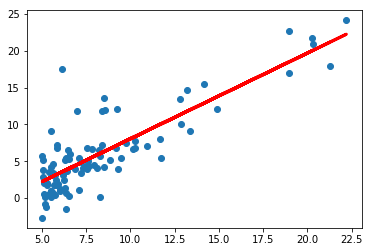

In [378]:
import numpy as np
from sklearn import linear_model


x = data['x'].values.reshape(-1, 1)
y = data['y'].values

clf = linear_model.SGDRegressor(alpha=0.01, loss='squared_loss', max_iter=100)
clf.fit(x, y)

y_hat = clf.predict(x)

plt.scatter(x, y)
plt.plot( x, y_hat, color='red', linewidth=3)
plt.show()